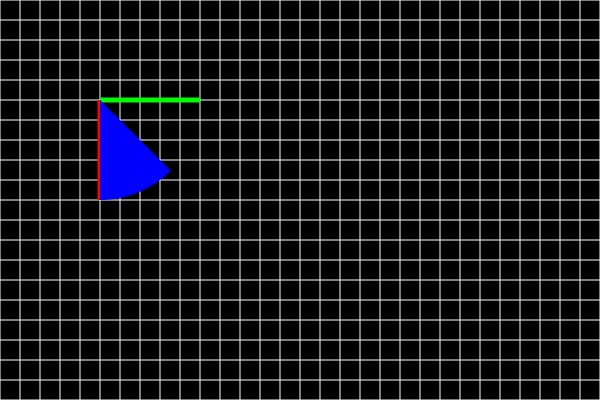

In [254]:
import cairo
from IPython.display import SVG, display, Image
import math

surface_size_x = 600
surface_size_y = 400
pixel_width = 20



def drawGrid(size_x, size_y, pixel_size, ct):
    for i in range(int(size_x / pixel_size)):
        for j in range(int(size_y / pixel_size)):
            ct.rectangle(i*pixel_size, j*pixel_size, pixel_size, pixel_size)
    ct.stroke()

def drawPixel(x, y, ct, r, g, b):
    ct.set_source_rgb(r, g, b)
    ct.rectangle(x*pixel_width, y*pixel_width, pixel_width, pixel_width)
    ct.fill()

def drawLine(x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    up = True

    if (dx < dy): # Slope >= 1
        temp = x1
        x1 = y1
        y1 = temp

        temp = x2
        x2 = y2
        y2 = temp

        temp = dx
        dx = dy
        dy = temp

        up = False


    m = 2 * dy - dx
    for i in range(0, dx):
        # print(m)
        # print(str(x1) + "," + str(y1))

        if (x1 < x2):
            x1 += 1
        else:
            x1 -= 1
        
        if (m < 0):
            if (up): # 
                drawPixel(x1, y1, ctx, 0, 0, 1) # Blue down\
                m += 2 * dy
            else:
                drawPixel(y1, x1, ctx, 0, 1, 1) # Cyan up\
                m += 2 * dy
        else:
            if (y1 < y2):
                y1 += 1
            else:
                y1 -= 1

            if (up): # 
                drawPixel(x1, y1, ctx, 1, 1, 0) # Yellow down/
            else:
                drawPixel(y1, x1, ctx, 1, 0, 1) # Pink up/

            m += 2 * dy - 2 * dx
        
        # print(str(x1) + "," + str(y1))

def drawrectangle(x1, y1, x2, y2, fill):
    pass

with cairo.SVGSurface("example.svg", 600, 400) as surface:
    cairo.ImageSurface(cairo.FORMAT_RGB24, surface_size_x, surface_size_y)
    ctx = cairo.Context(surface)
    ctx.set_source_rgb(0.0, 0.0, 0.0)
    ctx.paint()
    ctx.set_source_rgba(1.0, 1.0, 1.0)
    ctx.set_line_width(1)
    drawGrid(surface_size_x, surface_size_y, pixel_width, ctx)

    x1 = 100
    y1 = 100
    x2 = 100
    y2 = 200

    ctx.move_to(x1, y1)
    ctx.line_to(x2, y2)
    ctx.set_line_width(5)
    ctx.set_source_rgb(1, 0, 0)
    ctx.stroke()

    ctx.move_to(x1, y1)

    r = 100
    angle = 0
    a = float(math.pi * (angle / 180))
    x2 = x1 + r * math.cos(a)
    y2 = y1 + r * math.sin(a)

    ctx.line_to(x2, y2)
    ctx.set_source_rgb(0, 1, 0)
    ctx.set_line_width(5)
    ctx.stroke()

    ctx.set_source_rgb(0, 0, 1)
    ctx.move_to(x1, y1)
    a = 45
    b = 90

    ctx.arc(x1, y1, r, math.pi * (a / 180), math.pi * (b / 180))
    ctx.fill()

    drawPixel(x1, y1, ctx, 0, 1, 0) # Start Green
    drawPixel(x2, y2, ctx, 1, 0, 0) # Finish Red


    surface.write_to_png('rectangle.png')

display(SVG(filename="example.svg"))

# down/     up/     down\   up\
# 10        10      10      10
# 10        10      10      10
# 2         15      17      2
# 15        2       12      5

# Marvin Adinata
# 312110009


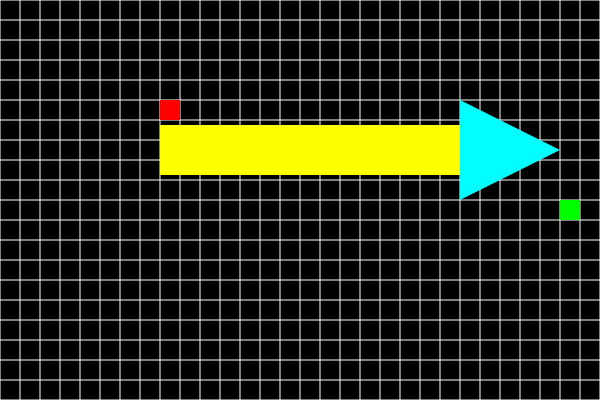

In [235]:
import cairo
from IPython.display import SVG, display, Image

surface_size_x = 600
surface_size_y = 400
pixel_width = 20

def drawGrid(size_x, size_y, pixel_size, ct):
    for i in range(int(size_x / pixel_size)):
        for j in range(int(size_y / pixel_size)):
            ct.rectangle(i*pixel_size, j*pixel_size, pixel_size, pixel_size)
    ct.stroke()

def drawPixel(x, y, ct, r, g, b):
    ct.set_source_rgb(r, g, b)
    ct.rectangle(x*pixel_width, y*pixel_width, pixel_width, pixel_width)
    ct.fill()

def drawBressenham(x1, y1, x2, y2, r, g, b):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    up = True

    if (dx < dy):
        temp = x1
        x1 = y1
        y1 = temp

        temp = x2
        x2 = y2
        y2 = temp

        temp = dx
        dx = dy
        dy = temp

        up = False

    p = 2 * dy - dx
    for i in range(0, dx):
        if (x1 < x2):
            x1 += 1
        else:
            x1 -= 1
        
        if (p < 0):
            if (up):
                drawPixel(x1, y1, ctx, r, g, b)
                p += 2 * dy
            else:
                drawPixel(y1, x1, ctx, r, g, b)
                p += 2 * dy
        else:
            if (y1 < y2):
                y1 += 1
            else:
                y1 -= 1

            if (up):
                drawPixel(x1, y1, ctx, r, g, b)
            else:
                drawPixel(y1, x1, ctx, r, g, b) 

            p += 2 * dy - 2 * dx

# From Class
def drawDDA(x1, y1, x2, y2, r, g, b):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)

    if (dy > dx):
        step = dy
    else:
        step = dx

    incx = dx / float(step)
    incy = dy / float(step)

    drawPixel(x1, y1, ctx, r, g, b)

    for i in range(step):
        x1 += incx
        y1 += incy
        drawPixel(int(x1), int(y1), ctx, r, g, b)

def drawRectangle(x1, y1, x2, y2, fill):
    # Decide what point the rectangle start to draw
    if (x2 < x1):
        temp = x1
        x1 = x2
        x2 = temp
    if (y2 < y1):
        temp = y1
        y1 = y2
        y2 = temp
    
    # Draw Outer Lines 
    # Last 3 drawDDA parameter is for the color
    drawBressenham(x1, y1, x1, y2, 1, 0, 1)
    drawBressenham(x1, y1, x2, y1, 0, 1, 1)
    drawBressenham(x2, y1, x2, y2, 1, 0, 1)
    drawBressenham(x1, y2, x2, y2, 0, 1, 1)

    # Fill the inner rectangle
    if (fill):
        for i in range(1, abs(x2-x1)):
            # print(i)
            drawDDA(x1 + i, y1 + 1, x1 + i, y2 - 1, 0, 0, 1)

def bressenham(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    p = 2 * dy - dx

    drawPixel(x1, y1, ctx, 1, 0, 1)
    for i in range(x1 + 1, x2 + 1):
        if (p < 0):
            x1 += 1
            p += 2 * dy
        else:
            x1 += 1
            y1 += 1
            p += 2 * dy - 2 * dx
        drawPixel(x1, y1, ctx, 1, 0, 1)

def drawCircle(xc, yc, r, context):
    x = 0
    y = r
    p = 1 - r
    while x <= y:
        drawPixel(xc + x, yc + y, context, 1, 0, 1)
        drawPixel(xc + y, yc + x, context, 1, 1, 0)
        drawPixel(xc + -x, yc + y, context, 1, 0, 1)
        drawPixel(xc + -y, yc + x, context, 1, 1, 0)
        drawPixel(xc + x, yc + -y, context, 1, 0, 1)
        drawPixel(xc + y, yc + -x, context, 1, 1, 0)
        drawPixel(xc + -x, yc + -y, context, 1, 0, 1)
        drawPixel(xc + -y, yc + -x, context, 1, 1, 0)
        x += 1
        if (p < 0):
            p += 2*x + 1
        else:
            y -= 1
            p += 2*x + 1 - 2*y  
        if (x > y):
            break

def drawArrow(ctx, x, y, width, height, a, b):
    ctx.set_source_rgb(1, 1, 0) # Yellow
    ctx.move_to(x, y + b)
    ctx.line_to(x, y + height - b)
    ctx.line_to(x + a, y + height - b)
    ctx.line_to(x + a, y + b)
    ctx.close_path()
    ctx.fill()
    
    ctx.set_source_rgb(0, 1, 1) # Cyan
    ctx.line_to(x + a, y)
    ctx.line_to(x + a, y + height)
    ctx.line_to(x + width, y + height / 2)
    ctx.close_path()
    ctx.fill()
    
with cairo.SVGSurface("example.svg", 600, 400) as surface:
    cairo.ImageSurface(cairo.FORMAT_RGB24, surface_size_x, surface_size_y)
    ctx = cairo.Context(surface)
    ctx.set_source_rgb(0.0, 0.0, 0.0)
    ctx.paint()
    ctx.set_source_rgba(1.0, 1.0, 1.0)
    ctx.set_line_width(1)
    drawGrid(surface_size_x, surface_size_y, pixel_width, ctx)
    
    x1 = 160
    y1 = 100
    width = 400
    height = 100
    a = 300
    b = 25

    drawArrow(ctx, x1, y1, width, height, a, b)

    # Draw Area
    drawPixel((x1 + width) / pixel_width, (y1 + height) / pixel_width, ctx, 0, 1, 0) # Start Green
    drawPixel(x1 / pixel_width, y1 / pixel_width, ctx, 1, 0, 0) # Finish Red

    surface.write_to_png('rectangle.png')
display(SVG(filename="example.svg"))

# Marvin Adinata
# 312110009


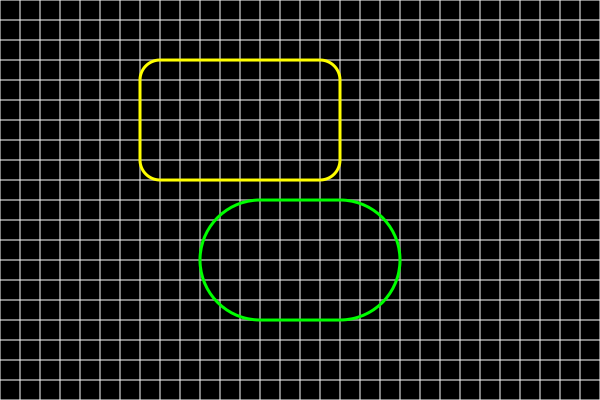

In [168]:
import cairo
from IPython.display import SVG, display, Image
import math

surface_size_x = 600
surface_size_y = 400
pixel_width = 20



def drawGrid(size_x, size_y, pixel_size, ct):
    for i in range(int(size_x / pixel_size)):
        for j in range(int(size_y / pixel_size)):
            ct.rectangle(i*pixel_size, j*pixel_size, pixel_size, pixel_size)
    ct.stroke()

def drawPixel(x, y, ct, r, g, b):
    ct.set_source_rgb(r, g, b)
    ct.rectangle(x*pixel_width, y*pixel_width, pixel_width, pixel_width)
    ct.fill()

def roundRect(x1, y1, w, h, r, ctx):
    a = 0
    b = 90
    ctx.arc(x1 + w - r, y1 + h - r, r, math.pi * (a / 180), math.pi * (b / 180))
    a = 90
    b = 180
    ctx.arc(x1 + r, y1 + h - r, r, math.pi * (a / 180), math.pi * (b / 180))
    a = 180
    b = 270
    ctx.arc(x1 + r, y1 + r, r, math.pi * (a / 180), math.pi * (b / 180))
    a = 270
    b = 360
    ctx.arc(x1 + w - r, y1 + r, r, math.pi * (a / 180), math.pi * (b / 180))
    ctx.close_path()

    ctx.stroke()

    pass

with cairo.SVGSurface("example.svg", 600, 400) as surface:
    cairo.ImageSurface(cairo.FORMAT_RGB24, surface_size_x, surface_size_y)
    ctx = cairo.Context(surface)
    ctx.set_source_rgb(0.0, 0.0, 0.0)
    ctx.paint()
    ctx.set_source_rgba(1.0, 1.0, 1.0)
    ctx.set_line_width(1)
    drawGrid(surface_size_x, surface_size_y, pixel_width, ctx)

    x1 = 200
    y1 = 200
    w = 200
    h = 120
    r = 60

    ctx.set_line_width(3)
    ctx.set_source_rgb(0, 1, 0)
    roundRect(x1, y1, w, h, r, ctx)
    ctx.set_source_rgb(1, 1, 0)
    roundRect(x1 - 60, y1 - 140, w, h, r - 40, ctx)

    surface.write_to_png('rectangle.png')

display(SVG(filename="example.svg"))

# Marvin Adinata
# 312110009


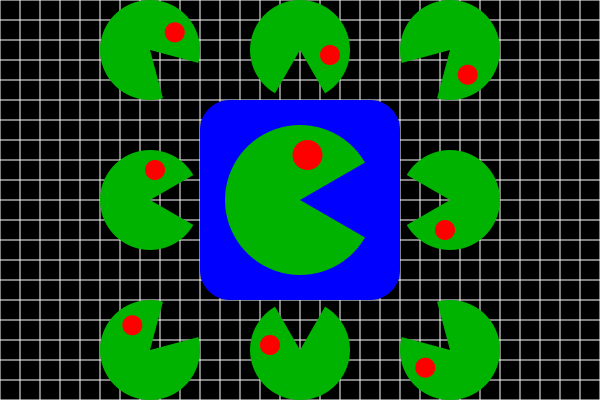

In [301]:
import cairo
from IPython.display import SVG, display, Image
import math

surface_size_x = 600
surface_size_y = 400
pixel_width = 20

def drawGrid(size_x, size_y, pixel_size, ct):
    for i in range(int(size_x / pixel_size)):
        for j in range(int(size_y / pixel_size)):
            ct.rectangle(i*pixel_size, j*pixel_size, pixel_size, pixel_size)
    ct.stroke()

def drawPixel(x, y, ct, r, g, b):
    ct.set_source_rgb(r, g, b)
    ct.rectangle(x*pixel_width, y*pixel_width, pixel_width, pixel_width)
    ct.fill()

def roundRect(x1, y1, w, h, r, ctx, fill):
    a = 0
    b = 90
    ctx.arc(x1 + w - r, y1 + h - r, r, math.pi * (a / 180), math.pi * (b / 180))
    a = 90
    b = 180
    ctx.arc(x1 + r, y1 + h - r, r, math.pi * (a / 180), math.pi * (b / 180))
    a = 180
    b = 270
    ctx.arc(x1 + r, y1 + r, r, math.pi * (a / 180), math.pi * (b / 180))
    a = 270
    b = 360
    ctx.arc(x1 + w - r, y1 + r, r, math.pi * (a / 180), math.pi * (b / 180))
    ctx.close_path()

    if(fill):
        ctx.fill()
    else:
        ctx.stroke()
    
    pass

def pacman(x, y, r, rotation, ctx):
    a = 30
    b = 330 
    
    ctx.save() # Save default pos
    
    # Transformation
    ctx.translate(x, y)
    ctx.rotate(math.pi * (rotation / 180))
    
    # Body
    ctx.set_source_rgb(0, 0.7, 0)
    ctx.move_to(0, 0)
    ctx.arc(0, 0, r, math.pi * (a / 180), math.pi * (b / 180))
    ctx.fill()

    # Eye
    ctx.set_source_rgb(1, 0, 0)
    ctx.arc(0 + r * 0.1, 0 + r * -0.6, r / 5, 0, 360)
    ctx.fill()

    ctx.restore() # Restore to default pos

with cairo.SVGSurface("example.svg", 600, 400) as surface:
    cairo.ImageSurface(cairo.FORMAT_RGB24, surface_size_x, surface_size_y)
    ctx = cairo.Context(surface)
    ctx.set_source_rgb(0.0, 0.0, 0.0)
    ctx.paint()
    ctx.set_source_rgba(1.0, 1.0, 1.0)
    ctx.set_line_width(1)
    drawGrid(surface_size_x, surface_size_y, pixel_width, ctx)
    
    box_x = surface_size_x / 3
    box_y = surface_size_y / 4
    box_width = 200
    box_height = 200
    box_roundest = 30

    pacman_x = surface_size_x 
    pacman_y = surface_size_y
    pacman_r = 50

    ctx.set_line_width(3)
    ctx.set_source_rgb(0, 0, 1)
    roundRect(box_x, box_y, box_width, box_height, box_roundest, ctx, 1)
    pacman(pacman_x * 4 / 8, pacman_y * 4 / 8, pacman_r * 1.5, 0, ctx)
    pacman(pacman_x * 2 / 8, pacman_y * 1 / 8, pacman_r, 45, ctx)
    pacman(pacman_x * 4 / 8, pacman_y * 1 / 8, pacman_r, 90, ctx)
    pacman(pacman_x * 6 / 8, pacman_y * 1 / 8, pacman_r, 135, ctx)
    pacman(pacman_x * 6 / 8, pacman_y * 4 / 8, pacman_r, 180, ctx)
    pacman(pacman_x * 6 / 8, pacman_y * 7 / 8, pacman_r, 225, ctx)
    pacman(pacman_x * 4 / 8, pacman_y * 7 / 8, pacman_r, 270, ctx)
    pacman(pacman_x * 2 / 8, pacman_y * 7 / 8, pacman_r, 315, ctx)
    pacman(pacman_x * 2 / 8, pacman_y * 4 / 8, pacman_r, 360, ctx)

    surface.write_to_png('rectangle.png')

display(SVG(filename="example.svg"))

# Marvin Adinata
# 312110009


In [1]:
# Defining region codes
INSIDE = 0 # 0000
LEFT = 1 # 0001
RIGHT = 2 # 0010
BOTTOM = 4 # 0100
TOP = 8 # 1000

# Defining x_max, y_max and x_min, y_min for rectangle
# Since diagonal points are enough to define a rectangle
x_max = 10.0
y_max = 8.0
x_min = 4.0
y_min = 4.0

# Function to compute region code for a point(x, y)
def computeCode(x, y):
	code = INSIDE
	if x < x_min: # to the left of rectangle
		code |= LEFT
	elif x > x_max: # to the right of rectangle
		code |= RIGHT
	if y < y_min: # below the rectangle
		code |= BOTTOM
	elif y > y_max: # above the rectangle
		code |= TOP
	return code

# Implementing Cohen-Sutherland algorithm
# Clipping a line from P1 = (x1, y1) to P2 = (x2, y2)
# Implementing Cohen-Sutherland algorithm
# Clipping a line from P1 = (x1, y1) to P2 = (x2, y2)
def cohenSutherlandClip(x1, y1, x2, y2):
	# Compute region codes for P1, P2
	code1 = computeCode(x1, y1)
	code2 = computeCode(x2, y2)
	accept = False

	while True:
		# If both endpoints lie within rectangle
		if code1 == 0 and code2 == 0:
			accept = True
			break
		# If both endpoints are outside rectangle
		elif (code1 & code2) != 0:
			break
		# Some segment lies within the rectangle
		else:
			# Line needs clipping
			# At least one of the points is outside,
			# select it
			x = 1.0
			y = 1.0
			if code1 != 0:
				code_out = code1
			else:
				code_out = code2
			# Find intersection point
			# using formulas y = y1 + slope * (x - x1),
			# x = x1 + (1 / slope) * (y - y1)
			if code_out & TOP:
				# Point is above the clip rectangle
				x = x1 + (x2 - x1) * (y_max - y1) / (y2 - y1)
				y = y_max
			elif code_out & BOTTOM:
				# Point is below the clip rectangle
				x = x1 + (x2 - x1) * (y_min - y1) / (y2 - y1)
				y = y_min
			elif code_out & RIGHT:
				# Point is to the right of the clip rectangle
				y = y1 + (y2 - y1) * (x_max - x1) / (x2 - x1)
				x = x_max
			elif code_out & LEFT:
				# Point is to the left of the clip rectangle
				y = y1 + (y2 - y1) * (x_min - x1) / (x2 - x1)
				x = x_min

			# Now intersection point (x, y) is found
			# We replace point outside clipping rectangle
			# by intersection point
			if code_out == code1:
				x1 = x
				y1 = y
				code1 = computeCode(x1, y1)
			else:
				x2 = x
				y2 = y
				code2 = computeCode(x2, y2)

	if accept:
		print("Line accepted from %.2f, %.2f to %.2f, %.2f" % (x1, y1, x2, y2))

		# Here the user can add code to display the rectangle
		# along with the accepted (portion of) lines

	else:
		print("Line rejected")

# Driver script

# First line segment
# P11 = (5, 5), P12 = (7, 7)
cohenSutherlandClip(5, 5, 7, 7)

# Second line segment
# P21 = (7, 9), P22 = (11, 4)
cohenSutherlandClip(7, 9, 11, 4)

# Third line segment
# P31 = (1, 5), P32 = (4, 1)
cohenSutherlandClip(1, 5, 4, 1)


Line accepted from 5.00, 5.00 to 7.00, 7.00
Line accepted from 7.80, 8.00 to 10.00, 5.25
Line rejected
